## 数据集的每一列代表的意思

怀孕次数（Pregnancies）：患者怀孕次数。

口服葡萄糖耐量试验中的血浆葡萄糖浓度（Glucose）：口服葡萄糖耐量试验中测得的血浆葡萄糖浓度，用于评估糖尿病风险。

舒张压（BloodPressure）：患者舒张压（毫米汞柱）。

三头肌皮褶厚度（SkinThickness）：三头肌皮褶的厚度（毫米）。

胰岛素水平（Insulin）：两小时血清胰岛素（mu U/ml）。

体重指数（BMI）：体重指数，即体重（公斤）除以身高（米）的平方。

糖尿病谱系功能（DiabetesPedigreeFunction）：糖尿病家族史的功能评分。

年龄（Age）：患者的年龄（岁）。

最后一列是目标变量（Outcome），它指示患者是否患有糖尿病。如果患者患有糖尿病，则该值为 1，否则为 0。

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
行数: 768, 列数: 9
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


<Figure size 640x480 with 0 Axes>

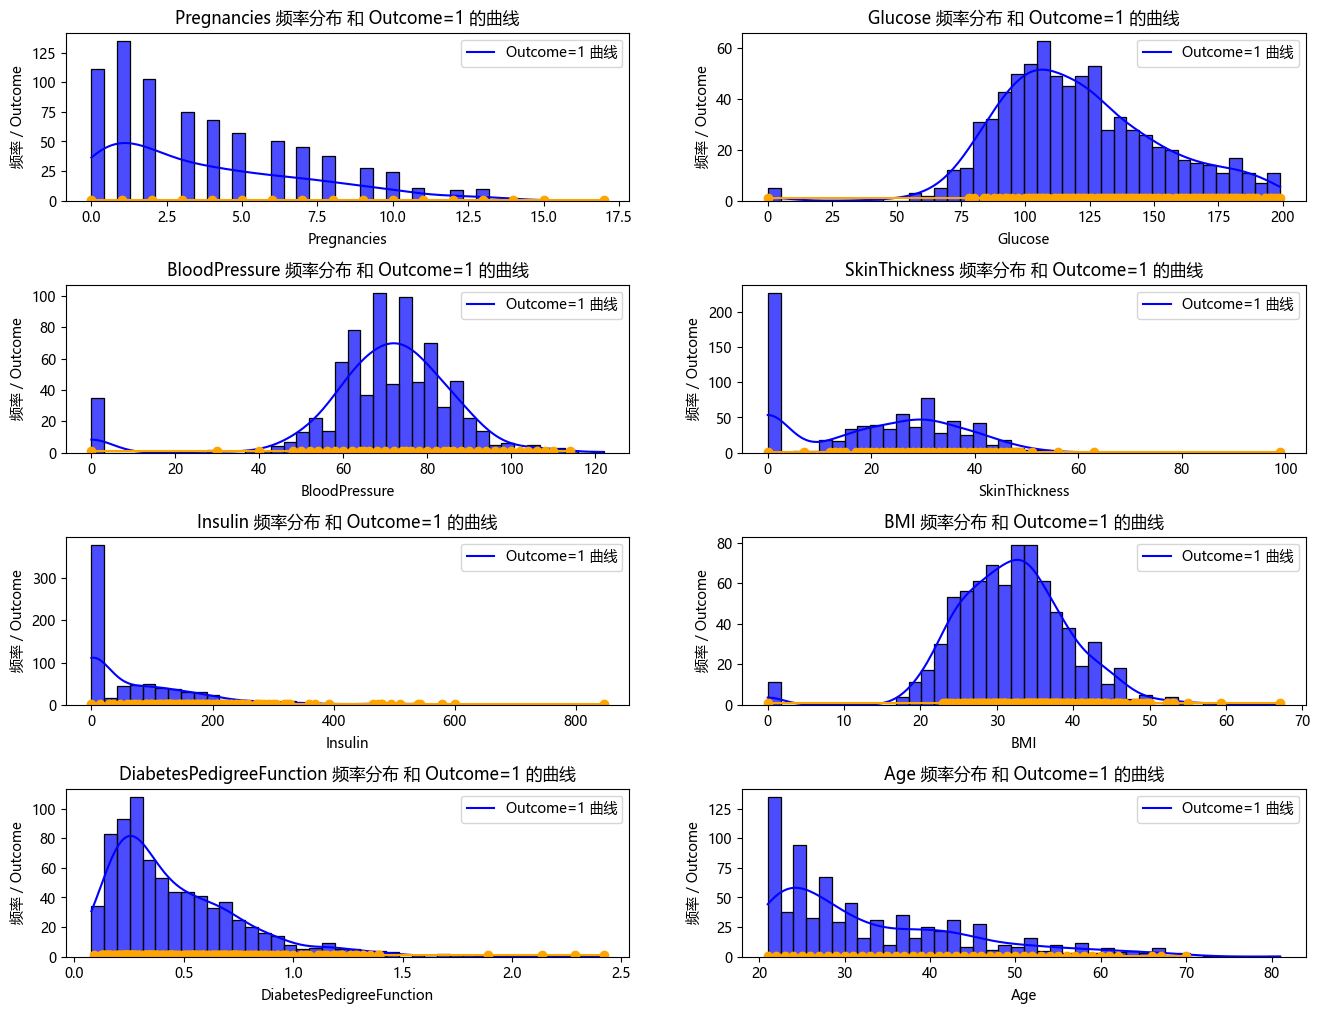

训练集准确率:  0.7703583061889251
测试集准确率：  0.7467532467532467


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 用于画图
import seaborn as sns # 用于画图
from sklearn.linear_model import LogisticRegression # 用于逻辑回归
from sklearn.model_selection import train_test_split # 用于数据集的拆分
from sklearn.metrics import accuracy_score # 用于评估模型

# 逻辑回归模型实现
# 读取数据集
RAW_Diabetes_Data_Path = "data/diabetes.csv"
RAW_Diabetes_Data = pd.read_csv(RAW_Diabetes_Data_Path)
# 查看数据集的信息
print(RAW_Diabetes_Data.head())
data_shape = RAW_Diabetes_Data.shape
print(f"行数: {data_shape[0]}, 列数: {data_shape[1]}")

# 存储数据集的每个列名
diabetes_columns = RAW_Diabetes_Data.columns
# 排除目标变量的列名
diabetes_features = [col for col in diabetes_columns if col != 'Outcome' ]

print(diabetes_features)

# 拆分数据集（80%的训练集和20%的测试集）
X_train, X_test, y_train, y_test = train_test_split(RAW_Diabetes_Data[diabetes_features], RAW_Diabetes_Data['Outcome'], test_size=0.2, random_state=42)

# 为什么选择 42？这实际上是一个传统的选择，源自于道格拉斯·亚当斯（Douglas Adams）的科幻小说《银河系漫游指南》（The Hitchhiker's Guide to the Galaxy）中的一个笑话。
# 在这部小说中，一群超级智能的生物建造了一台名为“深度思考机（Deep Thought）”的计算机，它的任务是计算出生命、宇宙以及一切的答案。而这个答案被计算出来是 "42"。
# 因此，程序员们常常将 "42" 作为随机种子，作为一种幽默和纪念的方式。

# 利用图表查看数据集各项数据之间的关系
# 修复matploylib的中文字体显示问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 开始创建图表
plt.figure(8)
# 设置图形大小和子图的布局
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

# 遍历米格特征值，绘制直方图和曲线
for i, feature in enumerate(diabetes_features):
    # 创建子图
    plt.subplot(4,2, i+1)
    
    # 绘制特征值的频率分布直方曲线
    sns.histplot(data=RAW_Diabetes_Data, x=feature, bins=40, kde=True, color='blue', alpha=0.7)
    
    # 计算每个特征值对应的Outcome的频率
    outcome1_freq = RAW_Diabetes_Data[RAW_Diabetes_Data['Outcome'] == 1].groupby(feature)['Outcome'].mean()
    
    # 绘制 Outcome=1 的曲线
    plt.plot(outcome1_freq.index, outcome1_freq.values, marker='o', color='orange', linestyle='-')
    
    # 添加标题和标签
    plt.title(f'{feature} 频率分布 和 Outcome=1 的曲线')
    plt.xlabel(feature)
    plt.ylabel('频率 / Outcome')
    
    # 添加图例(帮助理解曲线含义)
    plt.legend(['Outcome=1 曲线'])
    
# 显示图形
plt.show()

# 使用逻辑回归进行分类（利用max_iter设置迭代次数）
model = LogisticRegression(max_iter=1000)

# 使用训练集对模型进行训练
model.fit(X_train, y_train)

# 查看训练集的准确率
train_pred = model.predict(X_train)
# 计算模型的准确率
train_accuracy  = accuracy_score(y_train,train_pred)
print(f"训练集准确率: ", train_accuracy)


# 使用训练好的模型对测试集进行预测
test_pred = model.predict(X_test)
# 计算模型的准确率
test_accuracy = accuracy_score(y_test, test_pred)
print(f"测试集准确率： ", test_accuracy)
    





